### Day 5: Data Visualization: Beyond Matplotlib

#### Seaborn

In [1]:
# Import necessary libraries

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

np.random.seed(613)

In [2]:
# Load and display the dataset

tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


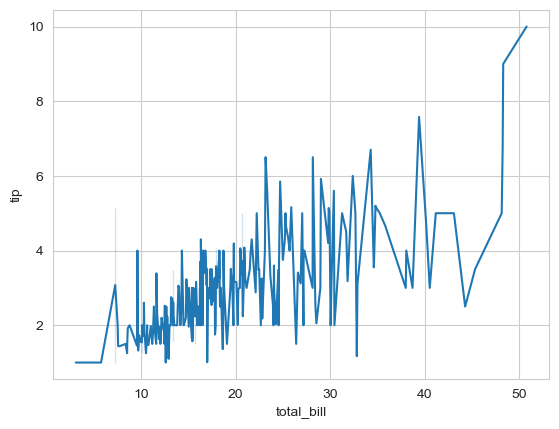

In [3]:
# Create a simple Seaborn plot

sns.set_style('whitegrid')      # Using a predefined style

sns.lineplot(data=tips, x='total_bill', y='tip')

plt.show()  # Shows only the plot and suppresses text outputs

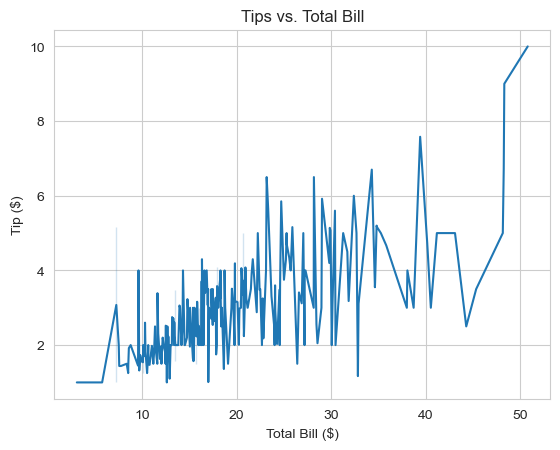

In [4]:
# Add title and axis labels

tipgraph = sns.lineplot(data=tips, x='total_bill', y='tip')
tipgraph.set(
    title='Tips vs. Total Bill',
    xlabel='Total Bill ($)',
    ylabel='Tip ($)')

plt.show()  # Shows only the plot and suppresses text outputs

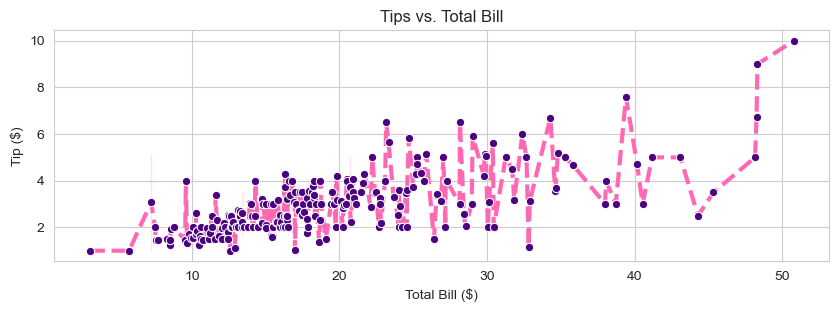

In [5]:
# Customize aesthetics

fig = plt.subplots(figsize=(10, 3))

tipgraph = sns.lineplot(data=tips, x='total_bill', y='tip',
                        color='hotpink',
                        linestyle='--',
                        linewidth=3,
                        marker='o',
                        markerfacecolor='indigo')

tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip ($)')

plt.show()

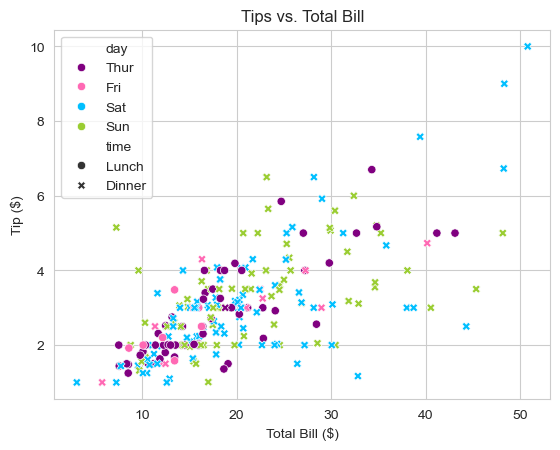

In [6]:
# Add other variables and further customize

tipgraph = sns.scatterplot(
    data=tips, x='total_bill', y='tip',
    style='time', hue='day',
    palette=['purple', 'hotpink', 'deepskyblue', 'yellowgreen']
)

tipgraph.set(
    title='Tips vs. Total Bill',
    xlabel='Total Bill ($)',
    ylabel='Tip ($)'
)

plt.show()

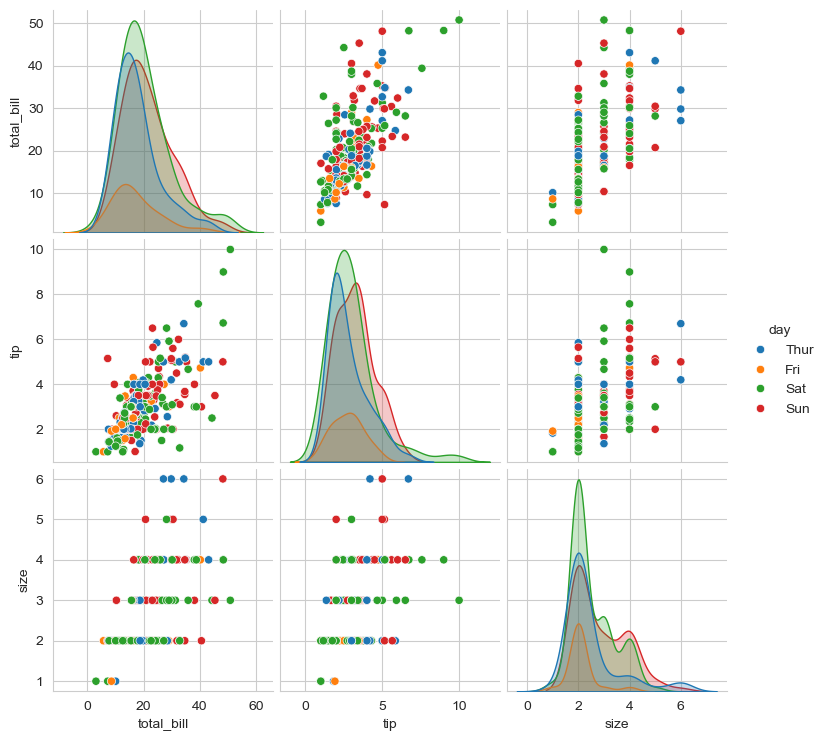

In [7]:
# Create a pairplot

sns.pairplot(data=tips, hue='day')  # plot each pair of variables colored by day
plt.show()

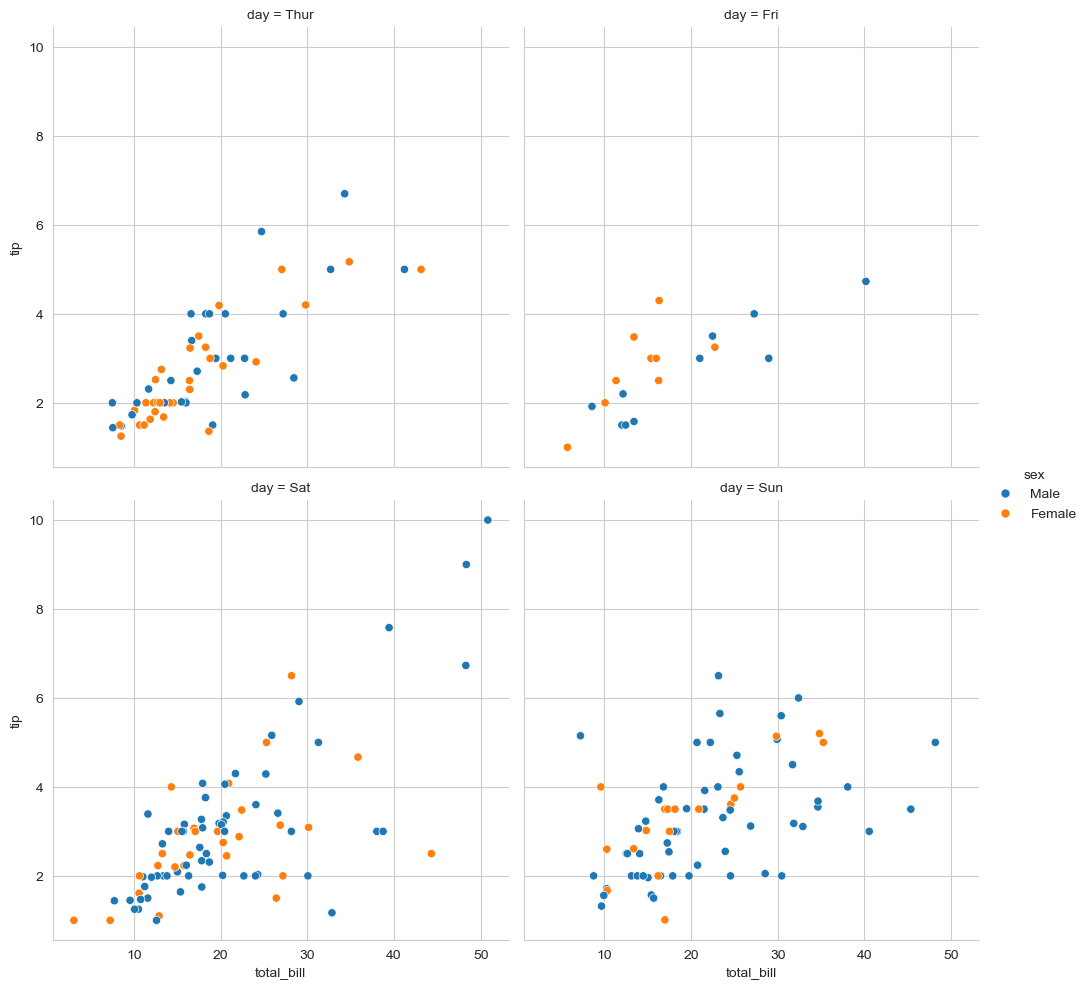

In [8]:
# Create a relplot

daysplot = sns.relplot(data=tips, x='total_bill', y='tip',
                        hue='sex',          # color plot by sex
                        col='day',          # seperate plots by day
                        kind='scatter',     # type of plot
                        col_wrap=2)         # wrap column after two plots

plt.show()

#### Plotly (interactive plots)

In [9]:
# Import the necessary package and construct sample data

import plotly.graph_objects as go

x1 = np.array(['luffy', 'zoro', 'nami', 'usopp', 'sanji'])
y1 = np.array([110, 180, 240, 99, 220])

In [10]:
# Make the plot using Plotly

graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1))

In [11]:
# Update layout to include titles

graph.update_layout(
    title='Pirate Scores',
    xaxis_title='Pirates',
    yaxis_title='Scores'
)

graph.show()

In [12]:
# Explort the plot to an HTML file

graph.write_html('pirate_scores.html')

In [13]:
# Further customize plotly visualizations

graph = go.Figure()

graph.add_trace(
    go.Scatter(
        x=x1, y=y1, mode='markers',
        marker=dict(
            size=15,
            color='hotpink',
            opacity=1,
            line=dict(width=5, color='purple')
        )
    )
)

graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, height=500
)

graph.show()

#### Wordclouds

In [14]:
# Import package and load data

from wordcloud import WordCloud

df = pd.read_csv(
    'https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv',
    on_bad_lines='skip'
)

df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

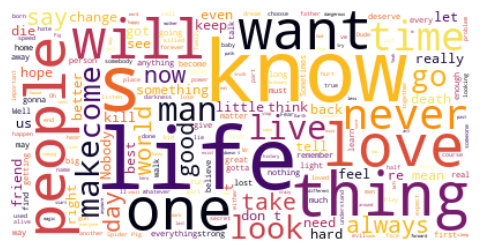

In [15]:
# Make a wordcloud using the above data

# Join quote text from all rows into a single string
text = ' '.join(each for each in df.quote)

# Generate a wordcloud image
wordcloud = WordCloud(background_color='white',
                      colormap='inferno',
                      random_state=63).generate(text)

# Use matplotlib to put image into a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

#### Venn diagrams

In [16]:
# Import the necessary package(s) and define data sets

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

A = set(['apple', 'banana', 'watermelon'])
B = set(['apple', 'pumpkin', 'blueberry', 'key lime'])

c:\Users\bisha\miniconda3\envs\dsi_participant\lib\site-packages\matplotlib_venn\_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



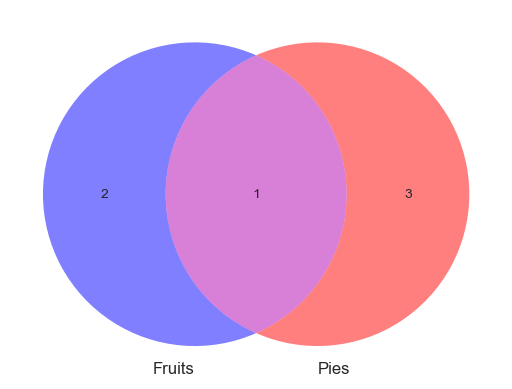

In [17]:
# Construct the venn diagram

diagram = venn2_unweighted(
    [A, B],
    set_labels=('Fruits', 'Pies'),
    set_colors=('blue', 'red'),
    alpha=0.5
)

plt.show()

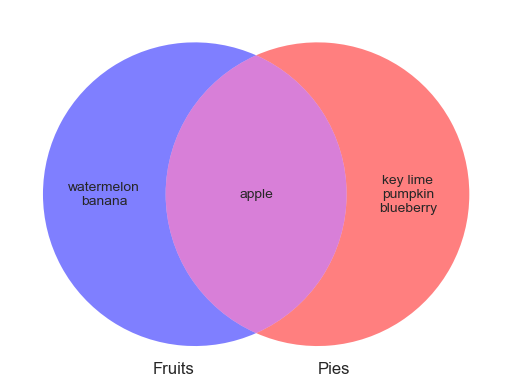

In [18]:
# Modify Venn diagram to show item labels instead of counts

diagram = venn2_unweighted(
    [A, B],
    set_labels=('Fruits', 'Pies'),
    set_colors=('blue', 'red'),
    alpha=0.5
)

diagram.get_label_by_id('10').set_text('\n'.join(A - B))
diagram.get_label_by_id('11').set_text('\n'.join(A & B))
diagram.get_label_by_id('01').set_text('\n'.join(B - A))

plt.show()
